### in-vehicle coupon recommendation Data Set

### dataset link : 

https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation

### Importing the required libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Reading the vehicle coupon dataset

In [96]:
vehicle_coupon_ds = pd.read_csv("in-vehicle-coupon-recommendation.csv")
vehicle_coupon_ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [97]:
vehicle_coupon_ds.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [98]:
vehicle_coupon_ds.shape

(12684, 26)

### Renaming the y variable

In [99]:
vehicle_coupon_ds = vehicle_coupon_ds.rename(columns={'Y': 'coupon_accept_data'})

In [100]:
vehicle_coupon_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### checking the missing values

In [101]:
vehicle_coupon_ds.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
coupon_accept_data          0
dtype: int64

<AxesSubplot:>

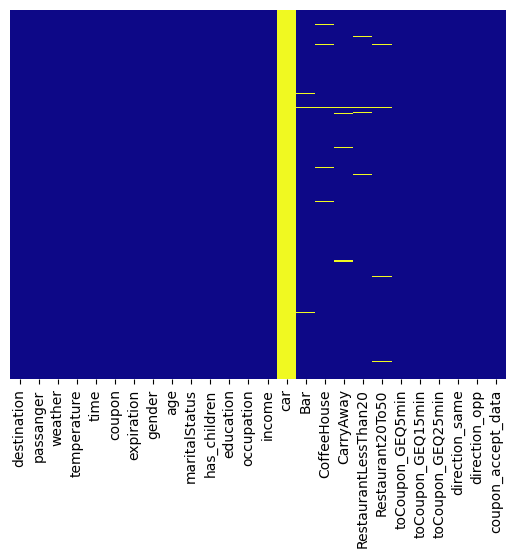

In [102]:
sns.heatmap(vehicle_coupon_ds.isnull(),yticklabels=False,cbar=False,cmap='plasma')

<AxesSubplot:xlabel='toCoupon_GEQ5min', ylabel='count'>

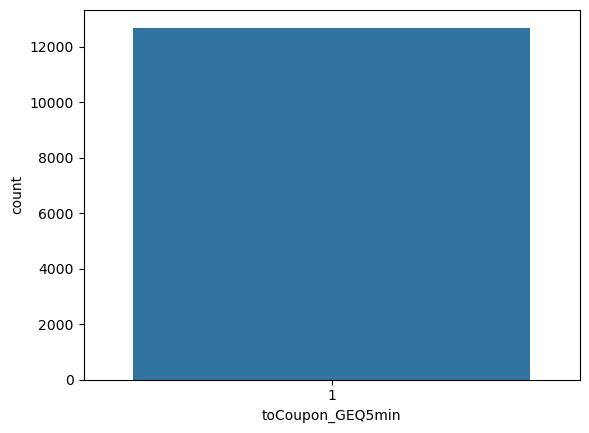

In [103]:
sns.countplot(vehicle_coupon_ds['toCoupon_GEQ5min'])

### Removing columns car and toCoupon_GEQ5min from dataset

In [104]:
vehicle_coupon_ds.pop('car')
vehicle_coupon_ds.pop('toCoupon_GEQ5min')

0        1
1        1
2        1
3        1
4        1
        ..
12679    1
12680    1
12681    1
12682    1
12683    1
Name: toCoupon_GEQ5min, Length: 12684, dtype: int64

In [105]:
vehicle_coupon_ds.shape

(12684, 24)

### finding missing data categorical variables

In [106]:
missing_categorical = [cat_var for cat_var in vehicle_coupon_ds.columns if vehicle_coupon_ds[cat_var].isnull().mean()>0 and vehicle_coupon_ds[cat_var].dtypes == 'O']

In [107]:
missing_categorical

['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

In [108]:
for col in missing_categorical:
    vehicle_coupon_ds[col].fillna(vehicle_coupon_ds[col].mode()[0], inplace = True)
    

In [109]:
vehicle_coupon_ds.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
coupon_accept_data      0
dtype: int64

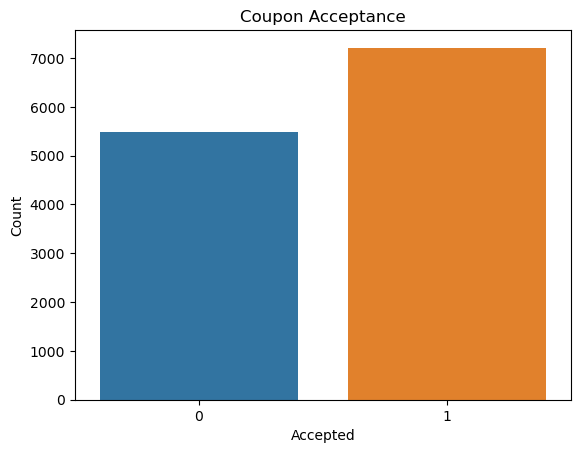

In [110]:
sns.countplot(x='coupon_accept_data', data=vehicle_coupon_ds)
plt.title('Coupon Acceptance')
plt.xlabel('Accepted')
plt.ylabel('Count')
plt.show()

In [111]:
vehicle_coupon_ds['coupon_accept_data'].value_counts()

1    7210
0    5474
Name: coupon_accept_data, dtype: int64

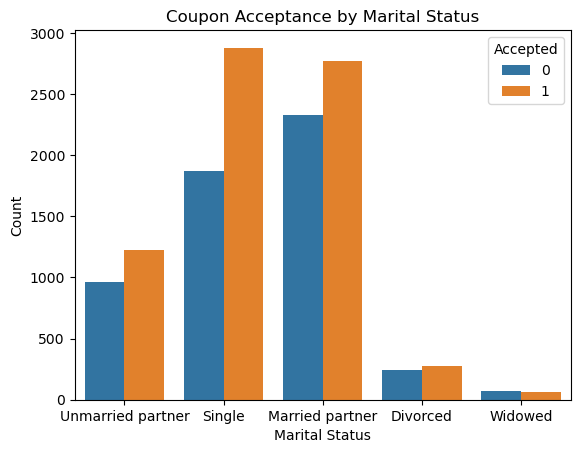

In [112]:
sns.countplot(x='maritalStatus', hue='coupon_accept_data', data=vehicle_coupon_ds)
plt.title('Coupon Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Accepted')
plt.show()


### Handling Class imbalance using the over sampling

In [114]:
from sklearn.utils import resample
df_vehicle_majority = vehicle_coupon_ds[(vehicle_coupon_ds['coupon_accept_data']==1)] 
df_vehicle_minority = vehicle_coupon_ds[(vehicle_coupon_ds['coupon_accept_data']==0)] 
df_vehicle_minority_upsampled = resample(df_vehicle_minority, 
                                 replace=True,    
                                 n_samples= 7210, 
                                 random_state=0)  
vehicle_sam_ds = pd.concat([df_vehicle_minority_upsampled, df_vehicle_majority])

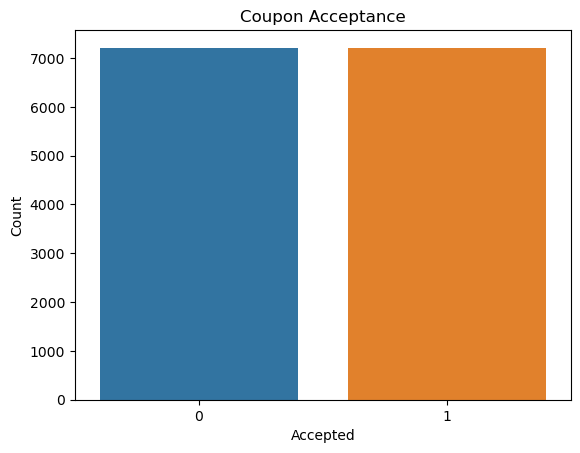

In [115]:
sns.countplot(x='coupon_accept_data', data=vehicle_sam_ds)
plt.title('Coupon Acceptance')
plt.xlabel('Accepted')
plt.ylabel('Count')
plt.show()

In [116]:
vehicle_sam_ds.shape

(14420, 24)

In [117]:
vehicle_sam_ds.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accept_data
6580,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,41,Married partner,...,4~8,1~3,4~8,gt8,less1,0,0,1,0,0
6231,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,41,Married partner,...,less1,less1,1~3,1~3,less1,0,0,1,0,0
4116,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),2h,Male,31,Married partner,...,never,never,1~3,1~3,never,0,0,0,1,0
7763,No Urgent Place,Partner,Snowy,30,2PM,Coffee House,2h,Male,21,Unmarried partner,...,4~8,1~3,4~8,1~3,less1,1,0,0,1,0
11509,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,below21,Single,...,gt8,1~3,less1,4~8,gt8,1,0,0,1,0
11323,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,50plus,Single,...,never,1~3,4~8,less1,less1,1,0,0,1,0
2599,Work,Alone,Sunny,55,7AM,Bar,1d,Male,50plus,Single,...,1~3,1~3,less1,1~3,less1,1,1,0,1,0
10238,Home,Alone,Rainy,55,6PM,Bar,1d,Female,below21,Unmarried partner,...,never,4~8,1~3,4~8,less1,1,1,0,1,0
8225,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,50plus,Widowed,...,never,never,1~3,less1,less1,1,0,0,1,0
1700,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Married partner,...,never,less1,1~3,1~3,never,0,0,0,1,0


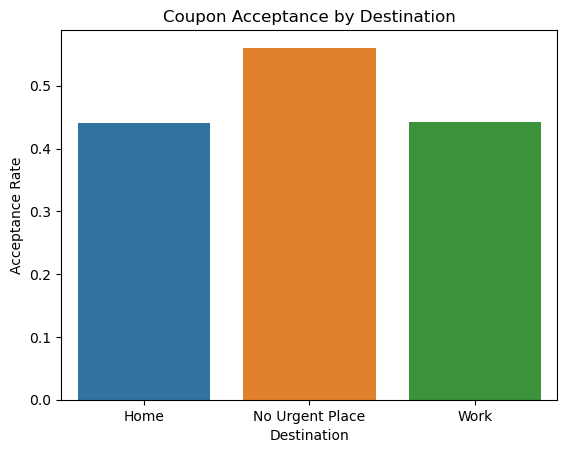

In [118]:
destination_acceptance = vehicle_sam_ds.groupby('destination')['coupon_accept_data'].mean().reset_index()
sns.barplot(x='destination', y='coupon_accept_data', data=destination_acceptance)
plt.title('Coupon Acceptance by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.show()

### Label encoding

In [119]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = vehicle_sam_ds.select_dtypes(include='object').columns.tolist()

# Convert categorical columns to numerical using LabelEncoder
LE = LabelEncoder()

for col in categorical_columns:
    vehicle_sam_ds[col] = LE.fit_transform(vehicle_sam_ds[col])



In [120]:
# Print the upandasated dataset
vehicle_sam_ds.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accept_data
6580,2,0,2,80,4,1,0,0,4,1,...,1,0,1,2,3,0,0,1,0,0
6231,2,0,2,80,4,2,1,0,4,1,...,3,3,0,0,3,0,0,1,0,0
4116,1,2,2,80,2,4,1,1,2,1,...,4,4,0,0,4,0,0,0,1,0
7763,1,3,1,30,2,2,1,1,0,3,...,1,0,1,0,3,1,0,0,1,0
11509,0,0,1,30,1,2,1,0,7,2,...,2,0,3,1,2,1,0,0,1,0
11323,1,1,2,80,1,0,0,0,6,2,...,4,0,1,3,3,1,0,0,1,0
2599,2,0,2,55,4,0,0,1,6,2,...,0,0,3,0,3,1,1,0,1,0
10238,0,0,0,55,3,0,0,0,7,3,...,4,1,0,1,3,1,1,0,1,0
8225,0,0,1,30,3,2,0,1,6,4,...,4,4,0,3,3,1,0,0,1,0
1700,1,1,2,80,0,2,1,0,1,1,...,4,3,0,0,4,0,0,0,1,0


### Correlation matrix

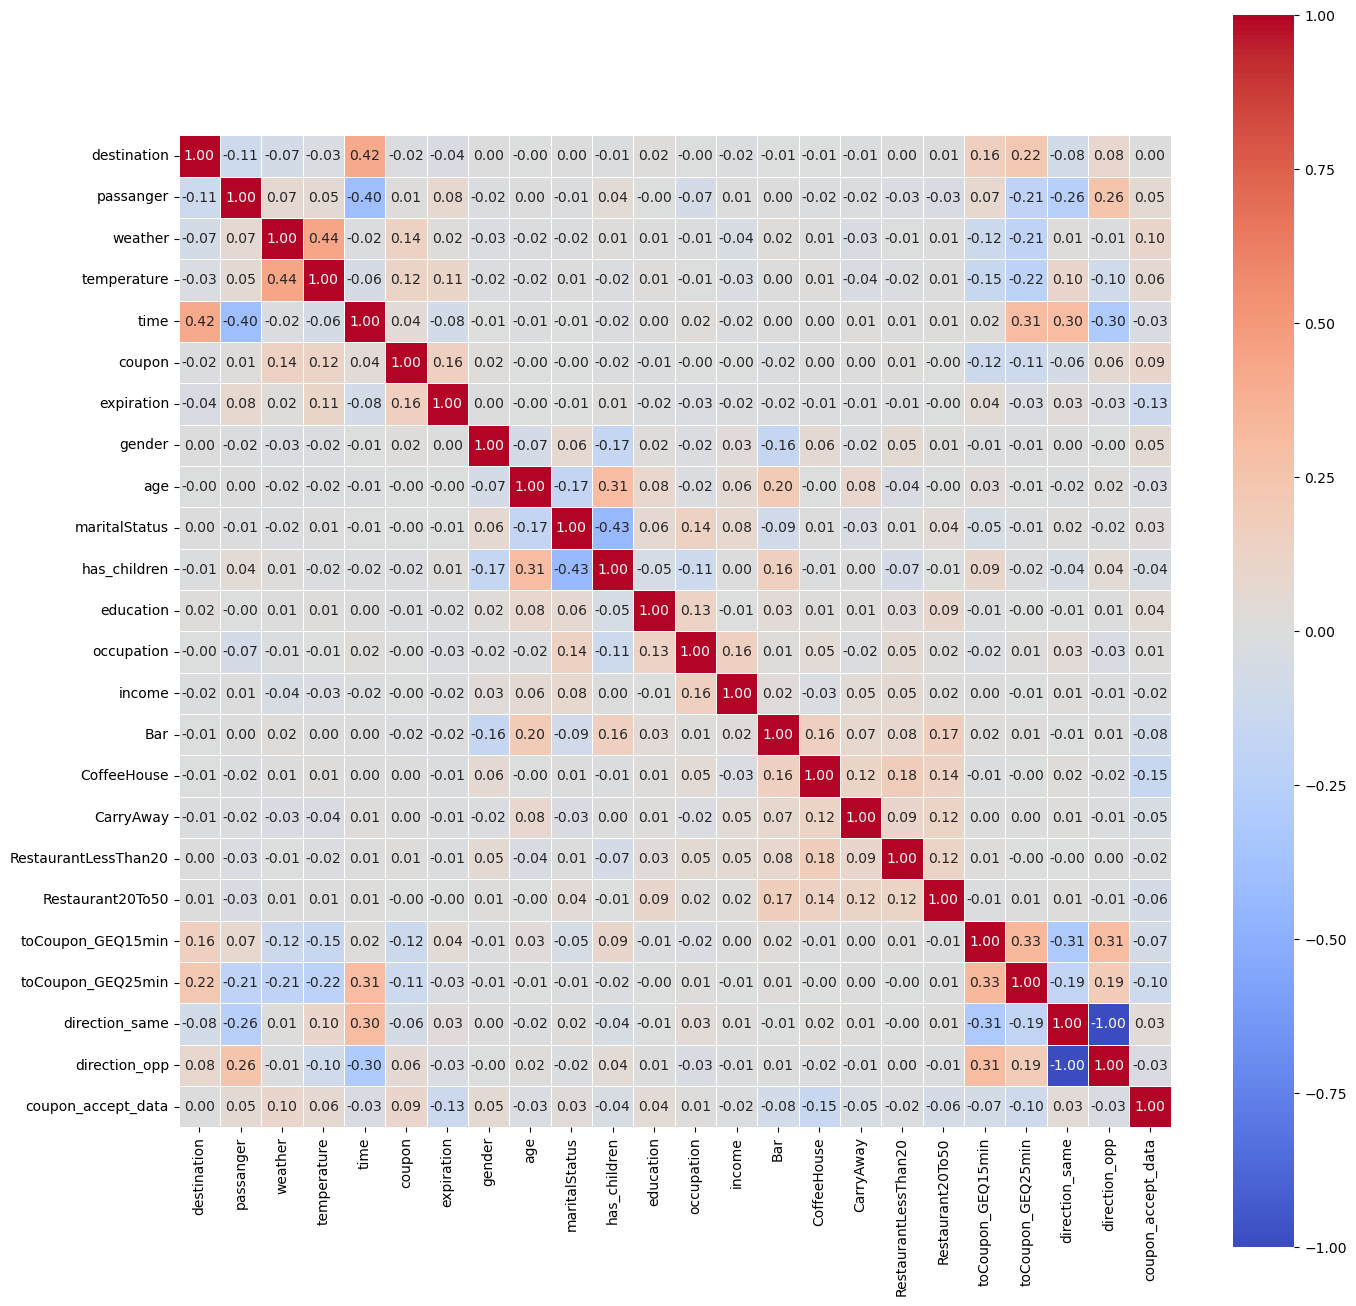

In [122]:

plt.figure(figsize=(16, 16)) 
sns.heatmap(vehicle_sam_ds.corr(), annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", square=True)

plt.show()

In [123]:
vehicle_sam_ds.describe()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accept_data
count,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,...,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000,14420.000000
mean,0.991817,0.664771,1.691054,63.105062,2.227393,2.037587,0.450139,0.481345,2.591886,1.705340,...,2.663592,2.141956,1.079057,1.059015,2.276838,0.562691,0.123648,0.207004,0.792996,0.500000
std,0.712263,0.939959,0.637645,19.209797,1.441351,1.346785,0.497525,0.499669,2.227993,0.831659,...,1.537453,1.534594,1.099145,1.169069,1.476610,0.496072,0.329191,0.405173,0.405173,0.500017
min,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,55.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,80.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.500000
75%,1.000000,1.000000,2.000000,80.000000,3.000000,3.000000,1.000000,1.000000,4.000000,2.000000,...,4.000000,3.000000,2.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,3.000000,2.000000,80.000000,4.000000,4.000000,1.000000,1.000000,7.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the data

In [124]:
x = vehicle_sam_ds.iloc[:,:-1]
y = vehicle_sam_ds.iloc[:,-1]
print(x.shape)
print(y.shape)

(14420, 23)
(14420,)


### standard scalar

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
x_std = StandardScaler().fit_transform(x)

In [127]:
x_std

array([[ 1.41551295, -0.70725909,  0.48452729, ..., -0.3756243 ,
         1.95724826, -1.95724826],
       [ 1.41551295, -0.70725909,  0.48452729, ..., -0.3756243 ,
         1.95724826, -1.95724826],
       [ 0.01148924,  1.42056818,  0.48452729, ..., -0.3756243 ,
        -0.51092139,  0.51092139],
       ...,
       [-1.39253448,  2.48448181,  0.48452729, ...,  2.66223459,
        -0.51092139,  0.51092139],
       [-1.39253448,  2.48448181, -2.65212076, ..., -0.3756243 ,
         1.95724826, -1.95724826],
       [ 1.41551295, -0.70725909, -2.65212076, ..., -0.3756243 ,
        -0.51092139,  0.51092139]])

### PCA ANALYSIS

In [128]:
import warnings
warnings.filterwarnings("ignore") 

In [129]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA(0.99)
pca_x = pca.fit_transform(x_std)
pca_com_percentages = pca.explained_variance_ratio_
for a, ratio in enumerate(pca_com_percentages):
    print(f"Principal Component {a+1}: {ratio:.2%}")


Principal Component 1: 10.91%
Principal Component 2: 9.17%
Principal Component 3: 7.87%
Principal Component 4: 6.75%
Principal Component 5: 6.06%
Principal Component 6: 5.25%
Principal Component 7: 4.74%
Principal Component 8: 4.44%
Principal Component 9: 4.38%
Principal Component 10: 4.16%
Principal Component 11: 4.06%
Principal Component 12: 3.80%
Principal Component 13: 3.70%
Principal Component 14: 3.62%
Principal Component 15: 3.46%
Principal Component 16: 3.10%
Principal Component 17: 2.95%
Principal Component 18: 2.89%
Principal Component 19: 2.48%
Principal Component 20: 2.37%
Principal Component 21: 2.20%
Principal Component 22: 1.62%


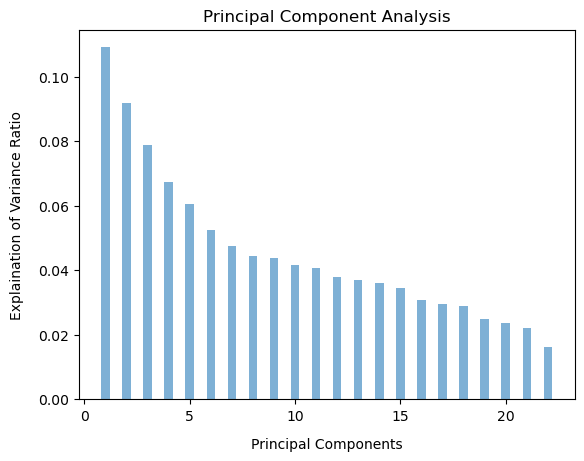

In [131]:
plt.bar(range(1, len(pca_com_percentages) + 1), pca_com_percentages, color='#7eb0d5', width = 0.4)

plt.title("Principal Component Analysis")
plt.xlabel("Principal Components", labelpad=10)
plt.ylabel("Explaination of Variance Ratio",labelpad=10)
plt.show()

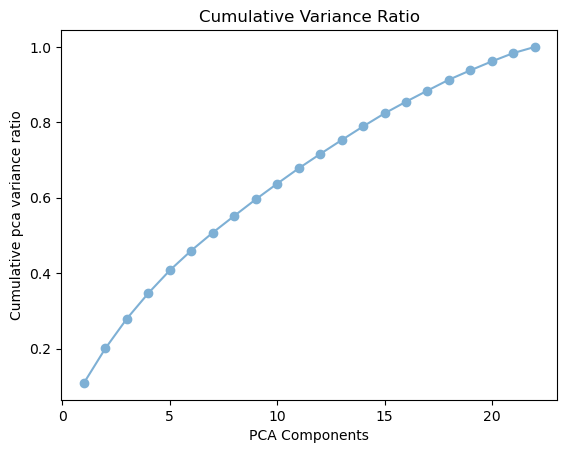

In [132]:
cumulative_pca_ratio = np.cumsum(pca_com_percentages)
plt.plot(range(1, len(cumulative_pca_ratio) + 1), cumulative_pca_ratio, marker='o', color="#7eb0d5")
plt.xlabel("PCA Components")
plt.ylabel("Cumulative pca variance ratio")
plt.title("Cumulative Variance Ratio")
plt.show()

### train test split model

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size = 0.2, random_state=0)

In [135]:
x_test.shape

(2884, 22)

### 1. Logistic Regression using Hyper parameter Tuning

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [87]:
from time import time
st_hy_log = time()
param_log_reg = {'penalty': ['l1','l2','elasticnet'],
                'C' : [a / 10.0 for a in range(1, 100, 1)] + list(range(1, 2000, 1))}

log_reg_grid = GridSearchCV(LogisticRegression(), param_grid=param_log_reg,cv= 10)
log_reg_grid.fit(x_train,y_train)
ed_hy_log = time()
best_parameter = log_reg_grid.best_params_
best_score = log_reg_grid.best_score_
print(" Total time taken :",ed_hy_log-st_hy_log)
print("Best parameters : ", best_parameter)
print("Best score :",best_score)





 Total time taken : 221.07139420509338
Best parameters :  {'C': 0.2, 'penalty': 'l2'}
Best score : 0.6223120756492369


total time taken :  0.024790048599243164
 Logistic Regression score is : 0.6310679611650486
 Logistic Regression mean squared error is : 0.6073977599851282

confusion matrix is : 

[[884 498]
 [566 936]]

classification report is : 

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      1382
           1       0.65      0.62      0.64      1502

    accuracy                           0.63      2884
   macro avg       0.63      0.63      0.63      2884
weighted avg       0.63      0.63      0.63      2884



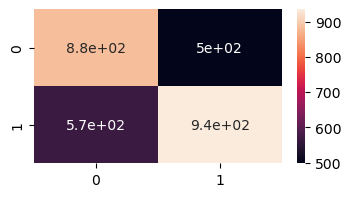

In [37]:
from time import time
st_time_log = time()
log_reg_model = LogisticRegression(penalty= 'l2', C = 0.2,max_iter=1000)
log_reg_model.fit(x_train,y_train)

#prediction
y_pred_log = log_reg_model.predict(x_test)

#calculating score
log_score = log_reg_model.score(x_test,y_test)
ed_time_log = time()
#error value
mse_log = np.sqrt(mean_squared_error(y_test,y_pred_log))

#classification report
class_rpt_log = classification_report(y_test,y_pred_log)

#confusion matrix
confusion_m = confusion_matrix(y_test,y_pred_log)

print("total time taken : ", ed_time_log-st_time_log)
print(" Logistic Regression score is :",log_score)
print(" Logistic Regression mean squared error is :",mse_log)


print("\nconfusion matrix is : \n")
print("==================================")
print(confusion_m)
plt.figure(figsize=(4,2))
sns.heatmap(confusion_m, annot=True)

print("\nclassification report is : \n")

print("==================================")
print(class_rpt_log)

### 2. KNearest Neighbors with Hyper Parameter Tuning

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [94]:
start_knn_time = time()
param_knn = {'n_neighbors' : range(3,30,2),
            'p' : [1,2,3,4]}
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=param_knn, cv=10)
grid_knn.fit(x_train,y_train)


best_parameter_knn = grid_knn.best_params_

best_score_knn = grid_knn.best_score_
ed_knn_time = time()
print("Total time taken : ",ed_knn_time-start_knn_time)
print("Best parameter :", best_parameter_knn)
print(" Best score :", best_score_knn)

Total time taken :  1383.9610769748688
Best parameter : {'n_neighbors': 3, 'p': 1}
 Best score : 0.6972953533920255


###  KNearest Neighbors

 KNeighbors Model values :

Total time taken is : 0.003162860870361328
 score : 0.7146324549237171
 
Confusion Matrix :
[[1053  329]
 [ 494 1008]]

classification report
               precision    recall  f1-score   support

           0       0.68      0.76      0.72      1382
           1       0.75      0.67      0.71      1502

    accuracy                           0.71      2884
   macro avg       0.72      0.72      0.71      2884
weighted avg       0.72      0.71      0.71      2884



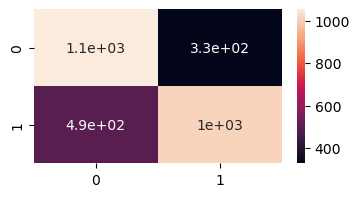

In [70]:
from time import time
start_time = time()
knn_model = KNeighborsClassifier(n_neighbors = 3, p =1)
knn_model.fit(x_train,y_train)
end_time = time()
y_pred_knn = knn_model.predict(x_test)

score_knn = knn_model.score(x_test,y_test)
confusion_knn = confusion_matrix(y_test,y_pred_knn)

class_rpt_knn = classification_report(y_test,y_pred_knn)

print(" KNeighbors Model values :\n")
print("=============================")
print("Total time taken is :", end_time-start_time)
print(" score :",score_knn)

print(" \nConfusion Matrix :")
print(confusion_knn)
plt.figure(figsize=(4,2))
sns.heatmap(confusion_knn, annot=True)
print("\nclassification report\n",class_rpt_knn)

### 3 . Decision Tree with Hyper Parameter Tuning

In [136]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [71]:
params_dt = {
    'criterion': ['gini', "entropy"],
    'max_depth': [i for i in range(1, 55, 5)], 
    'min_samples_leaf': [i for i in range(1, 11, 1)]}
grid_cv = GridSearchCV(DecisionTreeClassifier(), param_grid=params_dt, cv=10) 
grid_cv.fit(x_train, y_train)


print(" Best parameters : ",grid_cv.best_params_)
print("Best score : ",grid_cv.best_score_)

 Best parameters :  {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 1}
Best score :  0.7386441218071763


In [40]:
start_time_dt = time()
dec_tree_mdl = DecisionTreeClassifier(criterion = 'entropy', max_depth = 50,min_samples_leaf = 1)
dec_tree_mdl.fit(x_train,y_train)
end_time_dt = time()
y_pred_dec_tree = dec_tree_mdl.predict(x_test)

score_dec_tree = dec_tree_mdl.score(x_test,y_test)

con_matrix_dt = confusion_matrix(y_test,y_pred_dec_tree)

clas_rpt_dt = classification_report(y_test,y_pred_dec_tree)

print("Decision Tree Values :")
print("======================================")
print(" Total time taken :",end_time_dt-start_time_dt)
print("\nScore :",score_dec_tree)

print(" Confusion matrix :")
print(con_matrix_dt)

print("\nClassification Report :")
print(clas_rpt_dt)

Decision Tree Values :
 Total time taken : 0.30771589279174805

Score : 0.75
 Confusion matrix :
[[1135  247]
 [ 474 1028]]

Classification Report :
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1382
           1       0.81      0.68      0.74      1502

    accuracy                           0.75      2884
   macro avg       0.76      0.75      0.75      2884
weighted avg       0.76      0.75      0.75      2884



In [137]:
start_time_dt = time()
dec_tree_mdl = DecisionTreeClassifier(criterion = 'gini', max_depth = 50,min_samples_leaf = 1)
dec_tree_mdl.fit(x_train,y_train)
end_time_dt = time()
y_pred_dec_tree = dec_tree_mdl.predict(x_test)

score_dec_tree = dec_tree_mdl.score(x_test,y_test)

con_matrix_dt = confusion_matrix(y_test,y_pred_dec_tree)

clas_rpt_dt = classification_report(y_test,y_pred_dec_tree)

print("Decision Tree Values :")
print("======================================")
print(" Total time taken :",end_time_dt-start_time_dt)
print("\nScore :",score_dec_tree)

print(" Confusion matrix :")
print(con_matrix_dt)

print("\nClassification Report :")
print(clas_rpt_dt)

Decision Tree Values :
 Total time taken : 0.2555270195007324

Score : 0.7375173370319001
 Confusion matrix :
[[1132  250]
 [ 507  995]]

Classification Report :
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1382
           1       0.80      0.66      0.72      1502

    accuracy                           0.74      2884
   macro avg       0.74      0.74      0.74      2884
weighted avg       0.75      0.74      0.74      2884



### Support Vector Machine TECHNIQUE with hyper parameter tuning

In [84]:
from sklearn.svm import SVC

In [104]:
svm_mdl = SVC()
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly'],
    'gamma': ['scale', 'auto']
}
# Perform grid search to find the best hyperparameters
grid_search_svc = GridSearchCV(SVC(), param_grid=param_svm, cv=5)
grid_search_svc.fit(x_train, y_train)

best_parameter_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_
print("Best parameters :",best_parameter_svc)
print("best_score_svc :",best_score_svc)

Best parameters : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
best_score_svc : 0.7555480306714776


In [103]:
start_time_svm = time()
svc_mdl = SVC(C= 10, gamma = 'auto', kernel = 'poly', degree= 7)
svc_mdl.fit(x_train,y_train)

y_pred_svc = svc_mdl.predict(x_test)

scores_svc = svc_mdl.score(x_test,y_test)
end_time_svm = time()

cls_rpt_svc = classification_report(y_test,y_pred_svc)
confusion_mat = confusion_matrix(y_test,y_pred_svc)
print("Support vector machine Model :")

print("==============================")
print("Total time : ",end_time_svm - start_time_svm)
print("Confusion matrix : \n",confusion_mat)
print("\nscore is :",scores_svc)
print("\nclassification report :\n", cls_rpt_svc)

Support vector machine Model :
Total time :  12.621623754501343
Confusion matrix : 
 [[1111  271]
 [ 319 1183]]

score is : 0.7954230235783634

classification report :
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1382
           1       0.81      0.79      0.80      1502

    accuracy                           0.80      2884
   macro avg       0.80      0.80      0.80      2884
weighted avg       0.80      0.80      0.80      2884



### Ensemble Techniques

### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
param_randomf = {
    "criterion": ["gini", "entropy"], 
    "n_estimators": range(200, 1000, 200)}

em_start_time = time()
grid_rf_mdl = GridSearchCV(RandomForestClassifier(), param_grid=param_randomf, cv=5)
grid_rf_mdl.fit(x_train, y_train)
em_end_time = time()
print("Total time : ",em_end_time-em_start_time)
print('Best Random Forest parameters:', grid_rf_mdl.best_params_)
print('Best Score:', grid_rf_mdl.best_score_)

Total time :  1151.624617099762
Best Random Forest parameters: {'criterion': 'gini', 'n_estimators': 600}
Best Score: 0.802184482612259


Random forest model 
Total time :  37.87478518486023
 score:  0.8196948682385575
confusion matrix :
 [[1144  238]
 [ 282 1220]]

classification report :

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1382
           1       0.84      0.81      0.82      1502

    accuracy                           0.82      2884
   macro avg       0.82      0.82      0.82      2884
weighted avg       0.82      0.82      0.82      2884



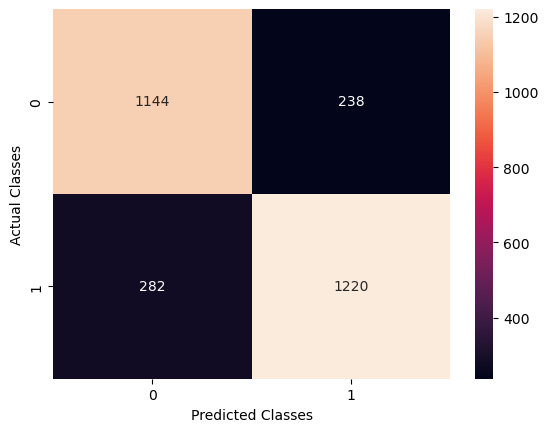

In [147]:
st_time_random = time()
ranfos_mdl = RandomForestClassifier(criterion="entropy", max_depth= 20,n_estimators=1000)
ranfos_mdl.fit(x_train, y_train)
end_time_random = time()
y_pred_rf = ranfos_mdl.predict(x_test)

scores_random_fos = ranfos_mdl.score(x_test,y_test)
confusion_rf_m = confusion_matrix(y_test,y_pred_rf)
cls_rpt_rf = classification_report(y_test,y_pred_rf)

print("Random forest model ")
print("============================")
print("Total time : ",end_time_random-st_time_random)
print(" score: ",scores_random_fos)
print("confusion matrix :\n",confusion_rf_m)
print("\nclassification report :\n")
print(cls_rpt_rf)
sns.heatmap(confusion_rf_m, annot=True,fmt=".0f")
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()


### BaggingClassifier with decision Tree

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg_dt_st = time()
dt_bag_clf = BaggingClassifier(DecisionTreeClassifier(criterion = 'gini', max_depth = 50,min_samples_leaf = 1), n_estimators=1000, bootstrap=True)
dt_bag_clf.fit(x_train, y_train)

y_pred_dt_bagging = dt_bag_clf.predict(x_test)

score_dt_bagging = dt_bag_clf.score(x_test,y_test)

confudion_bg_dt = confusion_matrix(y_test,y_pred_dt_bagging)
cls_rpt_dt_bagging = classification_report(y_test,y_pred_dt_bagging)
ed_dt_st = time()
print("Bagging classifier")
print("==============================")
print(" total time taken :",ed_dt_st-bg_dt_st )
print("confusion matrix")
print(confudion_bg_dt)
print(" Bagging classifier score :",score_dt_bagging)
print("classification report :")
print(cls_rpt_dt_bagging)

Bagging classifier
 total time taken : 147.44786405563354
confusion matrix
[[1147  235]
 [ 294 1208]]
 Bagging classifier score : 0.8165742024965326
classification report :
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1382
           1       0.84      0.80      0.82      1502

    accuracy                           0.82      2884
   macro avg       0.82      0.82      0.82      2884
weighted avg       0.82      0.82      0.82      2884



### Bagging classifier with Random Classifier

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

st_bag_rf = time()
rf_bag_clf = BaggingClassifier(RandomForestClassifier(), n_estimators=800, bootstrap=True)
rf_bag_clf.fit(x_train, y_train)
y_pred_rf_bagging = rf_bag_clf.predict(x_test)
score_rf_bagging = rf_bag_clf.score(x_test,y_test)
ed_bag_rf = time()
conf_mat_bg_rf = confusion_matrix(y_test,y_pred_rf_bagging)
cls_rpt_rf_bagging = classification_report(y_test,y_pred_rf_bagging)
print("Bagging classifier for Random Forest")
print("============================================")
print("Total time :",ed_bag_rf-st_bag_rf)
print(" Bagging classifier score :",score_rf_bagging)
print("confusion matrix :\n",conf_mat_bg_rf)
print("classification report")
print(cls_rpt_rf_bagging)

Bagging classifier for Random Forest
Total time : 1629.1724750995636
 Bagging classifier score : 0.812760055478502
confusion matrix :
 [[1161  221]
 [ 319 1183]]
classification report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1382
           1       0.84      0.79      0.81      1502

    accuracy                           0.81      2884
   macro avg       0.81      0.81      0.81      2884
weighted avg       0.81      0.81      0.81      2884



### Bagging Classifier with SVC

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
bg_svc_st = time()

svc_bag_clf = BaggingClassifier(SVC(C= 10, gamma = 'auto', kernel = 'poly', degree= 7), n_estimators=500, bootstrap=True)

svc_bag_clf.fit(x_train, y_train)

y_pred_svc_bagging = svc_bag_clf.predict(x_test)

score_svc_bagging = svc_bag_clf.score(x_test,y_test)

con_bg_svc = confusion_matrix(y_test,y_pred_svc_bagging)

cls_rpt_svc_bagging = classification_report(y_test,y_pred_svc_bagging)

bg_svc_ed = time()
print("Bagging Classifier SVC")
print("==============================================")
print("Total Time taken :",bg_svc_ed-bg_svc_st)
print("Confusion Matrix : ",con_bg_svc)
print(" Bagging classifier score :",score_svc_bagging)
print("classification report :")
print(cls_rpt_svc_bagging)

Bagging Classifier SVC
Total Time taken : 1765.4168410301208
Confusion Matrix :  [[1114  268]
 [ 331 1171]]
 Bagging classifier score : 0.7923023578363384
classification report :
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1382
           1       0.81      0.78      0.80      1502

    accuracy                           0.79      2884
   macro avg       0.79      0.79      0.79      2884
weighted avg       0.79      0.79      0.79      2884



### AdaBoosting with decision tree

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
np.random.seed(101)
st_ada_dt = time()
dt_ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200, 
                                algorithm="SAMME.R", learning_rate=0.5)
dt_ada_clf.fit(x_train, y_train)

y_pred_dt_ada = dt_ada_clf.predict(x_test)
dt_ada_score = dt_ada_clf.score(x_test,y_test)
con_ada_dt = confusion_matrix(y_test,y_pred_dt_ada)
cls_rpt_dt_ada = classification_report(y_test,y_pred_dt_ada)
ed_ada_dt = time()
print("Ada Boosting for Decision Tree ")
print("=================================================")
print("Total time taken : ",ed_ada_dt- st_ada_dt)
print("Confusion Matrix :",con_ada_dt)
print("score is: ",dt_ada_score)
print("classification report :")
print(cls_rpt_dt_ada)

Ada Boosting for Decision Tree 
Total time taken :  320.8298010826111
Confusion Matrix : [[1062  320]
 [ 204 1298]]
score is:  0.8183079056865464
classification report :
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1382
           1       0.80      0.86      0.83      1502

    accuracy                           0.82      2884
   macro avg       0.82      0.82      0.82      2884
weighted avg       0.82      0.82      0.82      2884



### AdaBoosting with Random Forest

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
st_ada_rf = time()
ada_rf = AdaBoostClassifier(RandomForestClassifier(), n_estimators=200, learning_rate=0.5)
ada_rf.fit(x_train, y_train)

y_pred_rf_ada = ada_rf.predict(x_test)

ada_rf_score = ada_rf.score(x_test,y_test)

con_ada_rf = confusion_matrix(y_test,y_pred_rf_ada)

cls_rpt_rf_ada = classification_report(y_test,y_pred_rf_ada)

ed_ada_rf = time()

print("Ada Boosting with Random Forest Classifier :")
print("===============================================")
print("total time taken : ", ed_ada_rf-st_ada_rf)
print("Score is : ",ada_rf_score)
print("Confusion Matrix : \n",con_ada_rf)
print("Classification Report : \n", cls_rpt_rf_ada)

Ada Boosting with Random Forest Classifier :
total time taken :  3785.963252067566
Score is :  0.8179611650485437
Confusion Matrix : 
 [[1146  236]
 [ 289 1213]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1382
           1       0.84      0.81      0.82      1502

    accuracy                           0.82      2884
   macro avg       0.82      0.82      0.82      2884
weighted avg       0.82      0.82      0.82      2884



### GradientBoostingClassifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier


In [73]:
grad_st = time()
grad_boos_mdl = GradientBoostingClassifier(n_estimators=500,learning_rate=0.5,min_samples_leaf=1,max_depth=10)
grad_boos_mdl.fit(x_train,y_train)

grad_boos_y_pred = grad_boos_mdl.predict(x_test)

grad_boos_score = grad_boos_mdl.score(x_test,y_test)

confusion_mat_grad = confusion_matrix(y_test,grad_boos_y_pred)


cls_rpt_gradbos = classification_report(y_test,grad_boos_y_pred)
grad_ed = time()
print("Gradient Boosting Classifier ")
print("===================================")
print("Total Time taken : ",grad_ed-grad_st)
print(" score : ",grad_boos_score)
print("confusion matrix :\n",confusion_mat_grad)
print("Classification Report : \n",cls_rpt_gradbos)

Gradient Boosting Classifier 
Total Time taken :  89.53206086158752
 score :  0.8252427184466019
confusion matrix :
 [[1156  226]
 [ 278 1224]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1382
           1       0.84      0.81      0.83      1502

    accuracy                           0.83      2884
   macro avg       0.83      0.83      0.83      2884
weighted avg       0.83      0.83      0.83      2884



In [80]:
grad_st = time()
grad_boos_mdl = GradientBoostingClassifier(n_estimators=900,learning_rate=0.1,min_samples_leaf=1,max_depth=15)
grad_boos_mdl.fit(x_train,y_train)

grad_boos_y_pred = grad_boos_mdl.predict(x_test)

grad_boos_score = grad_boos_mdl.score(x_test,y_test)

confusion_mat_grad = confusion_matrix(y_test,grad_boos_y_pred)


cls_rpt_gradbos = classification_report(y_test,grad_boos_y_pred)
grad_ed = time()
print("Gradient Boosting Classifier ")
print("===================================")
print("Total Time taken : ",grad_ed-grad_st)
print(" score : ",grad_boos_score)
print("confusion matrix :\n",confusion_mat_grad)
print("Classification Report : \n",cls_rpt_gradbos)

Gradient Boosting Classifier 
Total Time taken :  222.344664812088
 score :  0.834257975034674
confusion matrix :
 [[1146  236]
 [ 242 1260]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1382
           1       0.84      0.84      0.84      1502

    accuracy                           0.83      2884
   macro avg       0.83      0.83      0.83      2884
weighted avg       0.83      0.83      0.83      2884

